In [1]:
import h5py
import glob
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Setup
atl11_granule = 'ATL11_039903_0308_002_01.h5'


In [3]:
h5file = h5py.File(atl11_granule, 'r')

atlas_sdp_gps_epoch = h5file['ancillary_data']['atlas_sdp_gps_epoch'][0]
gps_epoch = datetime.datetime(1980,1,6,0,0,0) # GPS epoch start date/time
atlas_epoch = gps_epoch + datetime.timedelta(seconds=atlas_sdp_gps_epoch) # ATLAS epoch start date/time in GPS time

lats_atl11 = dict()
lons_atl11 = dict()
h_corrs_atl11 = dict()
gps_seconds = dict()

for pt in ['pt1', 'pt2', 'pt3']:
    lats_atl11[pt] = h5file[pt]['latitude'][:]
    lons_atl11[pt] = h5file[pt]['longitude'][:]

    h_corrs_atl11[pt] = h5file[pt]['h_corr'][:,:]
    h_corrs_atl11[pt][h_corrs_atl11[pt] == float(np.finfo(np.float32).max)] = np.nan

    gps_seconds[pt] = atlas_sdp_gps_epoch + h5file[pt]['delta_time'][:]
    gps_seconds[pt][gps_seconds[pt] == float(np.finfo(np.float64).max)] = np.nan
    
h5file.close()

Text(0.5, 1.0, 'dh(t)')

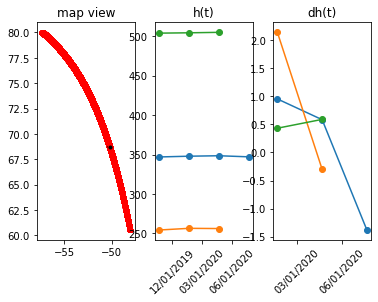

In [23]:
idx = 15000

fig, ax = plt.subplots(1,3)

for iax in [1,2]:
    ax[iax].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    ax[iax].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    
for pt in ['pt1', 'pt2', 'pt3']:
    ax[0].plot(lons_atl11[pt], lats_atl11[pt], 'r.')
    ax[0].plot(lons_atl11[pt][idx], lats_atl11[pt][idx], 'k.')
    
    t_utc = [datetime.datetime(1980,1,6) + relativedelta(seconds=sec) \
             for sec in gps_seconds[pt][idx,:] if not np.isnan(sec) ]
    h_corrs = h_corrs_atl11[pt][idx]
    h_corrs = h_corrs[~np.isnan(h_corrs)]
    
    ax[1].plot(t_utc, h_corrs, 'o-')
    
    ax[2].plot(t_utc[1:], np.diff(h_corrs), 'o-')
    
for iax in [1,2]:
    ax[iax].xaxis.set_tick_params(rotation=45)
#_ = ax[1].set_xticks([datetime.datetime(2019,1,1), datetime.datetime(2020,1,1)])
  
ax[0].set_title('map view')
ax[1].set_title('h(t)')
ax[2].set_title('dh(t)')
